In [1]:
!pip install hmmlearn

In [2]:
!pip install cvxopt

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [4]:
#importing data
covidHost_df = pd.read_csv("cases.csv")
print(covidHost_df.head())

         Date             Region  Total Cases  Active Cases  \
0  2020/08/04     Far North West        346.0             4   
1  2020/08/04     Far North West          NaN             0   
2  2020/08/04  Far North Central          0.0             0   
3  2020/08/04     Far North East          6.0             0   
4  2020/08/04     Far North East          NaN             0   

   Inpatient Hospitalizations  ICU Hospitalizations  Recovered Cases  Deaths  \
0                         0.0                   0.0            335.0     7.0   
1                         NaN                   NaN              NaN     NaN   
2                         0.0                   0.0              0.0     0.0   
3                         0.0                   0.0              6.0     0.0   
4                         NaN                   NaN              NaN     NaN   

   New Cases  Age 4 and Under  Age 5 to 11  Age 12 to 19  Age 20 to 39  \
0          0              NaN          NaN           NaN          

In [5]:
covidHost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18216 entries, 0 to 18215
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18216 non-null  object 
 1   Region                      18216 non-null  object 
 2   Total Cases                 7725 non-null   float64
 3   Active Cases                18216 non-null  int64  
 4   Inpatient Hospitalizations  7728 non-null   float64
 5   ICU Hospitalizations        7554 non-null   float64
 6   Recovered Cases             7723 non-null   float64
 7   Deaths                      7728 non-null   float64
 8   New Cases                   18216 non-null  int64  
 9   Age 4 and Under             101 non-null    float64
 10  Age 5 to 11                 101 non-null    float64
 11  Age 12 to 19                113 non-null    float64
 12  Age 20 to 39                552 non-null    float64
 13  Ages 40 to 59               552

In [6]:
covidHost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18216 entries, 0 to 18215
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18216 non-null  object 
 1   Region                      18216 non-null  object 
 2   Total Cases                 7725 non-null   float64
 3   Active Cases                18216 non-null  int64  
 4   Inpatient Hospitalizations  7728 non-null   float64
 5   ICU Hospitalizations        7554 non-null   float64
 6   Recovered Cases             7723 non-null   float64
 7   Deaths                      7728 non-null   float64
 8   New Cases                   18216 non-null  int64  
 9   Age 4 and Under             101 non-null    float64
 10  Age 5 to 11                 101 non-null    float64
 11  Age 12 to 19                113 non-null    float64
 12  Age 20 to 39                552 non-null    float64
 13  Ages 40 to 59               552

# Data Cleaning 

* Checking if there are empty cells and replacing them with NaN. Thus all cells are either NaN or have values.
* Checking for all NaN cells and replacing them with zeros. Thus all cells have 0 or >0 values.


In [7]:
#Check for empty cells in the entire DataFrame and replace with NaN

covidHost_df = covidHost_df.replace('', np.nan)

In [8]:
#Check for NaN under the entire DataFrame and replace with zeros
#Using inplace = True to change the original DataFrame

covidHost_df.fillna(0, inplace=True)

In [9]:
covidHost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18216 entries, 0 to 18215
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18216 non-null  object 
 1   Region                      18216 non-null  object 
 2   Total Cases                 18216 non-null  float64
 3   Active Cases                18216 non-null  int64  
 4   Inpatient Hospitalizations  18216 non-null  float64
 5   ICU Hospitalizations        18216 non-null  float64
 6   Recovered Cases             18216 non-null  float64
 7   Deaths                      18216 non-null  float64
 8   New Cases                   18216 non-null  int64  
 9   Age 4 and Under             18216 non-null  float64
 10  Age 5 to 11                 18216 non-null  float64
 11  Age 12 to 19                18216 non-null  float64
 12  Age 20 to 39                18216 non-null  float64
 13  Ages 40 to 59               182

In [10]:
#Checking if there are any null or NaN values
covidHost_df.isnull().values.any()

False

In [11]:
covidHost_df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
#saving the output to csv
covidHost_df.to_csv("output.csv")

In [13]:
covidHost_df.head()

,Date,Region,Total Cases,Active Cases,Inpatient Hospitalizations,ICU Hospitalizations,Recovered Cases,Deaths,New Cases,Age 4 and Under,Age 5 to 11,Age 12 to 19,Age 20 to 39,Ages 40 to 59,Age 60 to 79,Age 80+
0,2020/08/04,Far North West,346.0,4,0.0,0.0,335.0,7.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020/08/04,Far North West,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020/08/04,Far North Central,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020/08/04,Far North East,6.0,0,0.0,0.0,6.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020/08/04,Far North East,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
covidHost_df.tail()

,Date,Region,Total Cases,Active Cases,Inpatient Hospitalizations,ICU Hospitalizations,Recovered Cases,Deaths,New Cases,Age 4 and Under,Age 5 to 11,Age 12 to 19,Age 20 to 39,Ages 40 to 59,Age 60 to 79,Age 80+
18211,2022/02/06,South East,8191.0,142,14.0,0.0,7415.0,84.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18212,2022/02/06,South East,0.0,160,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18213,2022/02/06,South East,0.0,182,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18214,2022/02/06,South East,0.0,208,0.0,0.0,0.0,0.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18215,2022/02/06,Total,123258.0,9223,301.0,31.0,113023.0,1012.0,724,6734.0,12229.0,14297.0,44786.0,29868.0,11745.0,3599.0


## Converting the Data into a Time Series

In [15]:
#To make the date column to be parsed as a date field
parse_dates=covidHost_df['Date']

In [16]:
covidHost_df.head()

,Date,Region,Total Cases,Active Cases,Inpatient Hospitalizations,ICU Hospitalizations,Recovered Cases,Deaths,New Cases,Age 4 and Under,Age 5 to 11,Age 12 to 19,Age 20 to 39,Ages 40 to 59,Age 60 to 79,Age 80+
0,2020/08/04,Far North West,346.0,4,0.0,0.0,335.0,7.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020/08/04,Far North West,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020/08/04,Far North Central,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020/08/04,Far North East,6.0,0,0.0,0.0,6.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020/08/04,Far North East,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#set the index to be the date column
covidHost_df_DateInd = covidHost_df.set_index("Date")
covidHost_df_DateInd
#the value columns are placed higher than date to imply that it is a series.
covidHost_df_DateInd.to_csv("covidHost_df_DateInd.csv", index=True)  #first 7 columns

## Visualizing the time series

In [18]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    #plt.set_xticklabels(rotation = 90)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

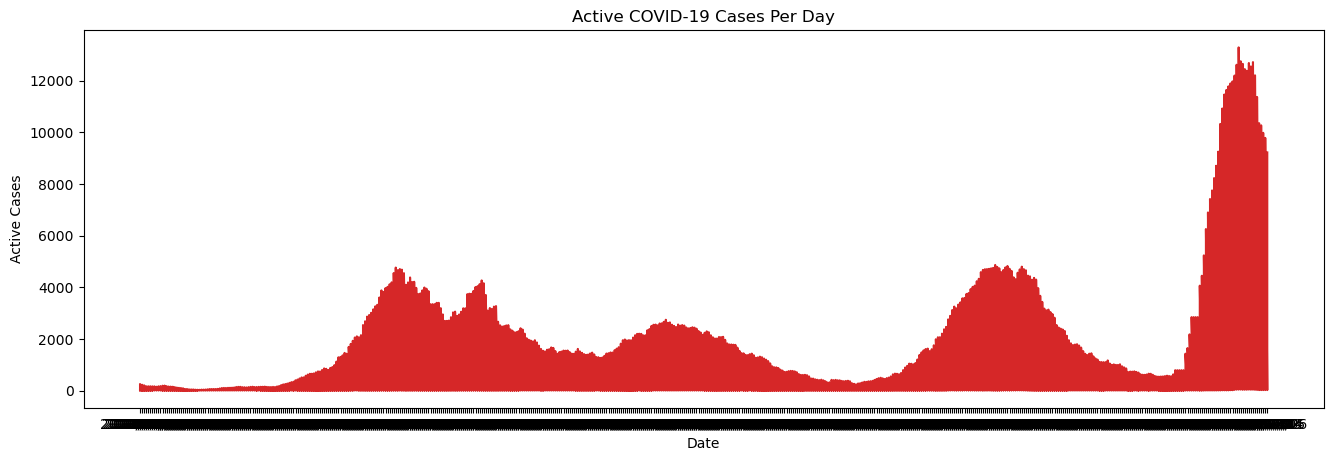

In [19]:
plot_df(covidHost_df_DateInd, x=covidHost_df_DateInd.index, y=covidHost_df_DateInd["Active Cases"], title="Active COVID-19 Cases Per Day", xlabel="Date", ylabel="Active Cases")

In [20]:
## Grouping cases by region
covidHost_df_groupReg = covidHost_df.groupby(["Region"])[["Active Cases", "Inpatient Hospitalizations", "ICU Hospitalizations", "Recovered Cases", "Deaths", "New Cases"]].sum().reset_index()
covidHost_df_groupReg.head()
#covidHost_df_groupReg.info()  #14 provinces/regions

#deleting the last row with totals
covidHost_df_groupReg.drop(covidHost_df_groupReg.tail(1).index, inplace=True)
covidHost_df_groupReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Region                      13 non-null     object 
 1   Active Cases                13 non-null     int64  
 2   Inpatient Hospitalizations  13 non-null     float64
 3   ICU Hospitalizations        13 non-null     float64
 4   Recovered Cases             13 non-null     float64
 5   Deaths                      13 non-null     float64
 6   New Cases                   13 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 832.0+ bytes


#### Active Cases Versus Deaths by Region in Saskatchewan

In [21]:
#regions
regions = covidHost_df_groupReg.Region
#active
active = covidHost_df_groupReg['Active Cases']

In [22]:
#plotting a horizontal bar chart using matplotlib
#plt.barh(regions,active)
#plt.title("Active Cases by Region in Saskatchewan")
#plt.ylabel("Region")
#plt.xlabel("Active COVID-19 cases")
#plt.show()

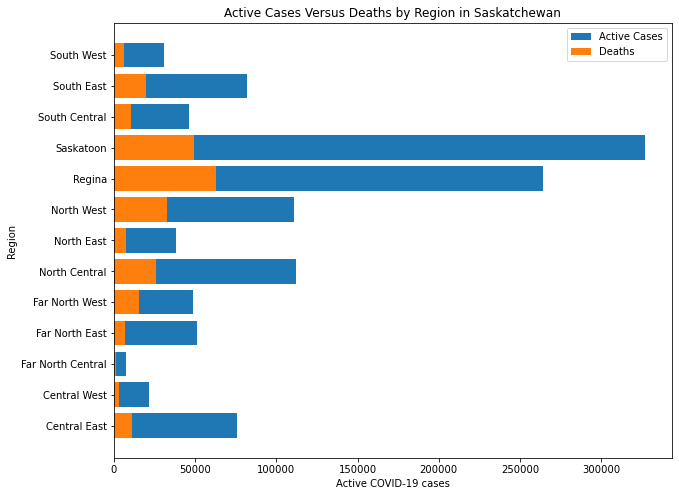

In [23]:
#plotting a horizontal bar chart using matplotlib
fig1, ax = plt.subplots(figsize=(10,8))
ax.barh(regions,active)
ax.barh(regions,covidHost_df_groupReg["Deaths"])
ax.set_title("Active Cases Versus Deaths by Region in Saskatchewan")
ax.set_ylabel("Region")
ax.set_xlabel("Active COVID-19 cases")
ax.legend(["Active Cases", "Deaths"])

plt.show()

#### Conclusion:
* More health resources (medical personnel and personal protective equipment, PPE) should be dedicated to the Saskatoon and Regina regions since they have the highest number of active cases and deaths due to COVID-19.

In [24]:
#plt.stem(regions,active)
#plt.show()

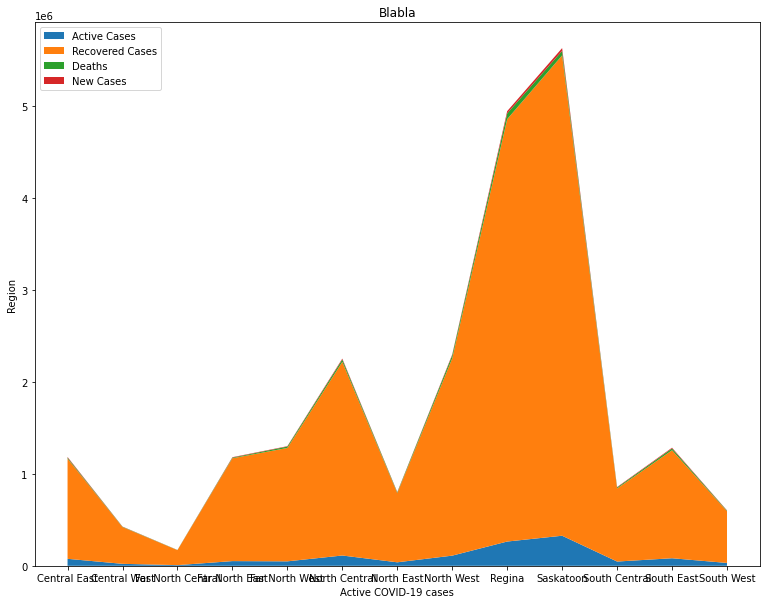

In [25]:
##plotting a stacked area chart
#plt.stackplot(regions,active,covidHost_df_groupReg["Recovered Cases"],covidHost_df_groupReg["Deaths"],covidHost_df_groupReg["New Cases"],labels=regions)
#plt.legend(loc="upper left")

fig1, ax = plt.subplots(figsize=(13,10))
ax.stackplot(regions,active,covidHost_df_groupReg["Recovered Cases"],covidHost_df_groupReg["Deaths"],covidHost_df_groupReg["New Cases"],labels=["Active Cases", "Recovered Cases", "Deaths", "New Cases"])
ax.set_title("Blabla")
ax.legend(loc="upper left")
ax.set_ylabel("Region")
ax.set_xlabel("Active COVID-19 cases")
plt.show()

In [26]:
#fig1, ax = plt.subplots(figsize=(15,12))
#ax.plot(regions,active)
#ax.plot(regions,covidHost_df_groupReg["Recovered Cases"])
#ax.plot(regions,covidHost_df_groupReg["Deaths"])
#ax.plot(regions,covidHost_df_groupReg["New Cases"])
#ax.set_title("Blabla")
#ax.legend(loc="upper left")
#ax.set_ylabel("Region")
#ax.set_xlabel("Active COVID-19 cases")
#plt.show()

#### COVID-19 Related Hospitalizations by Region in Saskatchewan

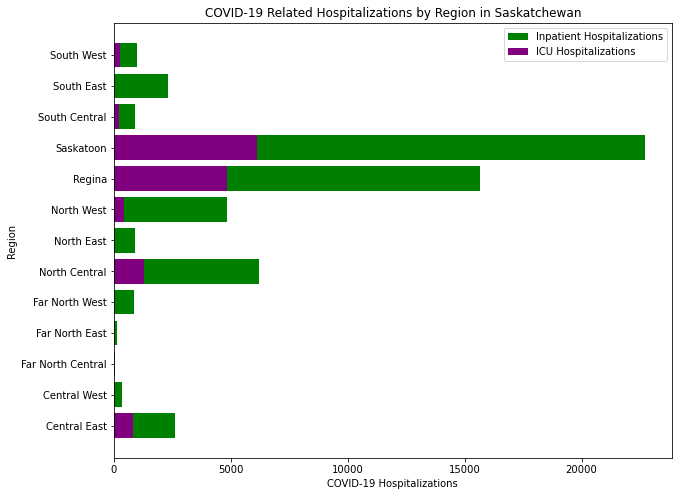

In [27]:
#Graph of COVID-19 related hospitalizations

#plotting a horizontal bar chart using matplotlib
fig1, ax = plt.subplots(figsize=(10,8))
ax.barh(regions,covidHost_df_groupReg["Inpatient Hospitalizations"],color="green")
ax.barh(regions,covidHost_df_groupReg["ICU Hospitalizations"],color="purple")
ax.set_title("COVID-19 Related Hospitalizations by Region in Saskatchewan")
ax.set_ylabel("Region")
ax.set_xlabel("COVID-19 Hospitalizations")
ax.legend(["Inpatient Hospitalizations", "ICU Hospitalizations"])

plt.show()

#### Conclusion:
* Saskatoon has the greatest amount on strain on its health resources, followed by Regina due to the high number of COVID-related ICU hospitalizations.
More health resources (medical personnel and personal protective equipment, PPE) should be dedicated to the Saskatoon and Regina regions.
Medical personnel from the far north central, far north east, central west and far north west regions could be posted to Saskatoon and Regina, in order to have more medical staff to attend to patients hospitalized and in ICU due to COVID-19.
More PPE should be supplied to Saskatoon and Regina and less to the rest.